      ID  VELOCIDAD DIRECCARD  DIRECCION
0   E-01        1.3       SSW      202.5
1   E-01        1.3       SSW      202.5
2   E-01        1.3       SSW      202.5
3   E-01        1.3       SSW      202.5
4   E-01        2.2       SSE      157.5
5   E-01        1.8       SSE      157.5
6   E-01        2.2       SSE      157.5
7   E-01        3.1        SE      135.0
8   E-01        2.7        SE      135.0
9   E-01        2.2        SE      135.0
10  E-01        2.2       ESE      112.5
11  E-01        1.5         S      180.0
12  E-01        2.2       ESE      112.5
13  E-01        1.8       ESE      112.5
14  E-01        1.8        SE      135.0
15  E-01        2.2         S      180.0
16  E-01        2.7        SE      135.0
17  E-01        2.2        SE      135.0
18  E-01        1.3        SE      135.0
19  E-01        0.9         S      180.0
20  E-01        1.8        SE      135.0
21  E-01        1.8       ESE      112.5
22  E-01        1.3        SE      135.0
23  E-01        

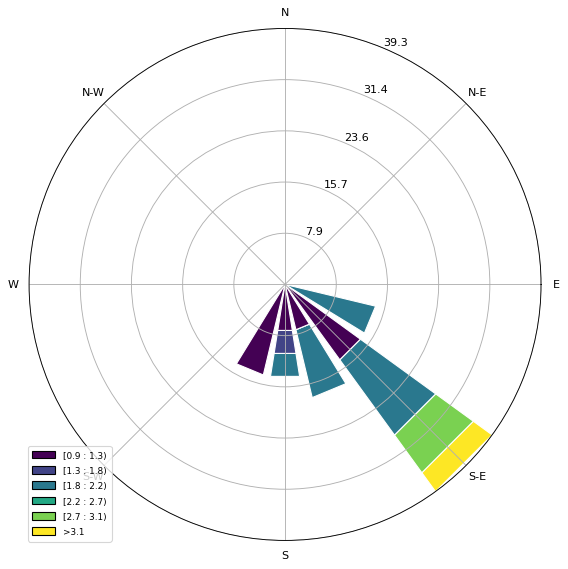

In [9]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from math import pi
from windrose import WindroseAxes
df = pd.read_excel('Datos_Rosa_de_Vientos.xlsx')
df
ax = WindroseAxes.from_ax()
ax.bar(df.DIRECCION, df.VELOCIDAD, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
print(df)

In [2]:
from windrose import WindroseAxes

# Importamos los datos de un Excel

In [53]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import ttk

# CARGO EL ARCHIVO Y MODIFICO EL NOMBRE DE LA COLUMNA QUE CONTIENE LOS NODOS:
vientos = pd.read_csv("C:/Users/Christian/Desktop/CLASES_2DOSEM/clase_6/Datos-Vientos.csv", sep=";")
vientos.rename(columns={"Kts": "Nodos"}, inplace=True)

# DETERMINO EN LISTAS LAS DIRECCIONES Y LOS INTERVALOS:
direcciones = [0, 10, 20, 50, 70, 90, 110, 140, 160, 180, 200, 230, 250, 270, 290, 320, 340, 360]
rangos = [(0, 3), (3, 6), (6, 10), (10, 16), (16, 21), (21, 27), (27, 33), (33, 40), (40, 50)]
datos_puros = pd.DataFrame(index=direcciones)

# ITERO CADA ELEMENTO DE DIRECCIONES Y RANGOS PARA IR CREANDO MI DATAFRAME:
for direccion in direcciones:
    for rango in rangos:
        filtro = (vientos['DIRECCION'] == direccion) & (vientos['Nodos'] > rango[0]) & (vientos['Nodos'] <= rango[1])
        cantidad_nodos = vientos.loc[filtro, 'Nodos'].count()
        datos_puros.loc[direccion, f"{rango[0]}-{rango[1]}"] = cantidad_nodos

datos_puros = datos_puros.astype(int)

direcciones_pista = list(range(0, 361, 10))

def viento_cruzado(direcciones_pista):
    v_c_list = []  
    for w in direcciones_pista:
        v_c = pd.DataFrame(index=direcciones)
        for direccion in datos_puros.index:
            for rango in rangos:
                angulo_en_radianes = (direccion - w) * np.pi / 180
                result = np.abs(rango[1] * np.sin(angulo_en_radianes))
                result_dec = round(result, 2)
                v_c.loc[direccion, f"{rango[0]}-{rango[1]}"] = result_dec
        v_c_list.append(v_c)  
    return v_c_list

def frecuencia_admisible():
    
    f_ad_list = []  
    v_c_list = viento_cruzado(direcciones_pista)
    maxim = float('-inf')
    maxim_w = None

    for idx, w in enumerate(direcciones_pista):  # Añadir enumerate para obtener índice y valor
        v_c = v_c_list[idx]  # Obtener el v_c correspondiente a la iteración actual
        f_ad = pd.DataFrame(index=direcciones)
        
        for direccion in v_c.index:
            for rango in rangos:
                x = v_c.loc[direccion, f"{rango[0]}-{rango[1]}"]
                if x < 20:
                    valor_cantidad_nodos = datos_puros.loc[direccion, f"{rango[0]}-{rango[1]}"]
                    f_ad.loc[direccion, f"{rango[0]}-{rango[1]}"] = valor_cantidad_nodos
                else:
                    f_ad.loc[direccion, f"{rango[0]}-{rango[1]}"] = 0
        
        f_ad = f_ad.astype(int)
        f_ad_list.append(f_ad)
        
    return f_ad_list

def coheficiente():
    x = frecuencia_admisible()
    viento_calma = 10853
    suma_total_frec = datos_puros.drop(columns=["Rad"]).sum().sum()
    for i in x:
        suma=i.sum().sum()
        cohe = ((suma + viento_calma) / (viento_calma + suma_total_frec) * 100).round(2)
        print(cohe)
print(datos_puros)
print(datos_puros.sum().sum())
x=datos_puros.sum(axis=1)
print(list(x))


     0-3   3-6  6-10  10-16  16-21  21-27  27-33  33-40  40-50
0      0     0     0      0      0      0      0      0      0
10   176    15     0      0      0      0      0      0      0
20    32   284   294    481    170     35      1      0      0
50    29   223   198    267     88      8      2      0      0
70    18   181   182    200     34     12      0      0      0
90    22   183   150    144     42     16      0      0      0
110   27   236   177    308    139     28      0      0      0
140   31   249   159    204     35     10      0      0      0
160   48   235   166    157     36      9      0      0      0
180   70   273    88    110     23     11      0      0      0
200  122   679   157    132     52     14      0      1      0
230  146  1112   399    438    167     85     16      4      1
250  139  1310   999   2106   1728   1491    328     85      8
270   91   599   596   1474   1253   1294    348     71      3
290  110   839  1022   2998   2147   1875    510    125

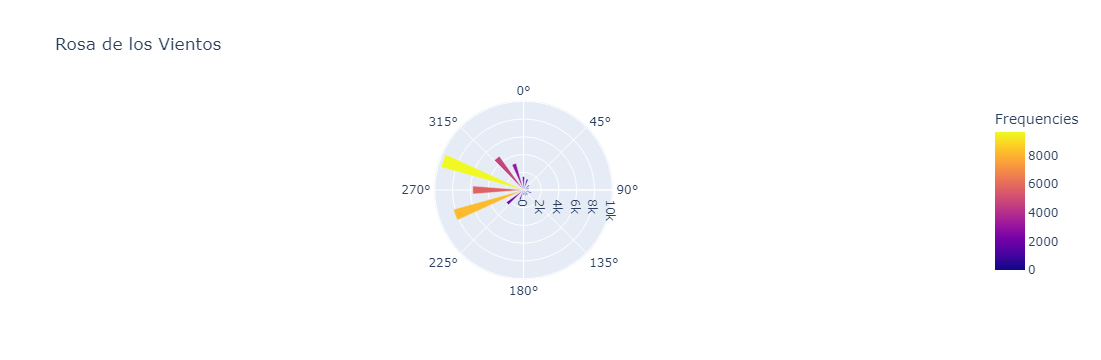

[0, 191, 1297, 815, 627, 557, 915, 688, 651, 575, 1157, 2368, 8194, 5729, 9641, 4686, 3123, 1505]


In [56]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import ttk
import plotly.express as px

# CARGO EL ARCHIVO Y MODIFICO EL NOMBRE DE LA COLUMNA QUE CONTIENE LOS NODOS:
vientos = pd.read_csv("C:/Users/Christian/Desktop/CLASES_2DOSEM/clase_6/Datos-Vientos.csv", sep=";")
vientos.rename(columns={"Kts": "Nodos"}, inplace=True)

# DETERMINO EN LISTAS LAS DIRECCIONES Y LOS INTERVALOS:
direcciones = [0, 10, 20, 50, 70, 90, 110, 140, 160, 180, 200, 230, 250, 270, 290, 320, 340, 360]
rangos = [(0, 3), (3, 6), (6, 10), (10, 16), (16, 21), (21, 27), (27, 33), (33, 40), (40, 50)]
datos_puros = pd.DataFrame(index=direcciones)

# ITERO CADA ELEMENTO DE DIRECCIONES Y RANGOS PARA IR CREANDO MI DATAFRAME:
for direccion in direcciones:
    for rango in rangos:
        filtro = (vientos['DIRECCION'] == direccion) & (vientos['Nodos'] > rango[0]) & (vientos['Nodos'] <= rango[1])
        cantidad_nodos = vientos.loc[filtro, 'Nodos'].count()
        datos_puros.loc[direccion, f"{rango[0]}-{rango[1]}"] = cantidad_nodos

datos_puros = datos_puros.astype(int)
datos_puros.insert(0, "Rad", datos_puros.index * (np.pi / 180))
datos_puros["Rad"] = datos_puros["Rad"].round(2)
direcciones_pista = list(range(0, 361, 10))

def viento_cruzado(direcciones_pista):
    v_c=pd.DataFrame(index=direcciones)
    a=int(input("valor:"))
    for direccion in datos_puros.index:
        
        for rango in rangos:
            angulo_en_radianes = (direccion -a) * np.pi / 180
            result = np.abs(rango[1] * np.sin(angulo_en_radianes))
            result_dec = round(result, 2)
            v_c.loc[direccion, f"{rango[0]}-{rango[1]}"] = result_dec
          
    return v_c

def frecuencia_admisible():
    
    y = viento_cruzado(direcciones_pista)
    f_ad = pd.DataFrame(index=direcciones)

    for direccion in datos_puros.index:
        for rango in rangos:
            x = y.loc[direccion, f"{rango[0]}-{rango[1]}"]
            if pd.notna(x) and x < 20:
                valor_cantidad_nodos = datos_puros.loc[direccion, f"{rango[0]}-{rango[1]}"]
                f_ad.loc[direccion, f"{rango[0]}-{rango[1]}"] = valor_cantidad_nodos
            else:
                f_ad.loc[direccion, f"{rango[0]}-{rango[1]}"] = 0
        
    f_ad = f_ad.astype(int)
        
    return f_ad

def coheficiente():
    x = frecuencia_admisible()
    viento_calma = 10853
    suma_total_frec = datos_puros.drop(columns=["Rad"]).sum().sum()
    suma=x.sum().sum()
    cohe = ((suma + viento_calma) / (viento_calma + suma_total_frec) * 100).round(2)
    print(cohe)
        

def rosa():
    direcciones = [0, 10, 20, 50, 70, 90, 110, 140, 160, 180, 200, 230, 250, 270, 290, 320, 340, 360]
    frecuencias = [0, 191, 1297, 815, 627, 557, 915, 688, 651, 575, 1157, 2368, 8194, 5729, 9641, 4686, 3123, 1505]

    # Crear un DataFrame para utilizar Plotly Express
    df = pd.DataFrame({'Direcciones': direcciones, 'Frequencies': frecuencias})

    # Crear el gráfico polar con Plotly Express
    fig = px.bar_polar(df, r='Frequencies', theta='Direcciones', color='Frequencies',
                       color_continuous_scale='plasma', title='Rosa de los Vientos')

    # Ajustar la escala de colores estableciendo los valores mínimo y máximo
    fig.update_coloraxes(cmin=min(frecuencias), cmax=max(frecuencias))

    # Mostrar el gráfico
    fig.show()
    print(frecuencias)

rosa()